# Covariance and Correlation

Covariance measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

- The angle between two vectors is the measure of how far apart they are in direction. There are different ways to calculate the angle between two vectors, but one of the most common is using the dot product formula. The dot product formula is:
$$\theta = \cos^{-1}\left(\frac{\vec{a} \cdot \vec{b}}{||\vec{a}|| ||\vec{b}||}\right)$$

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

-0.1695057043903936

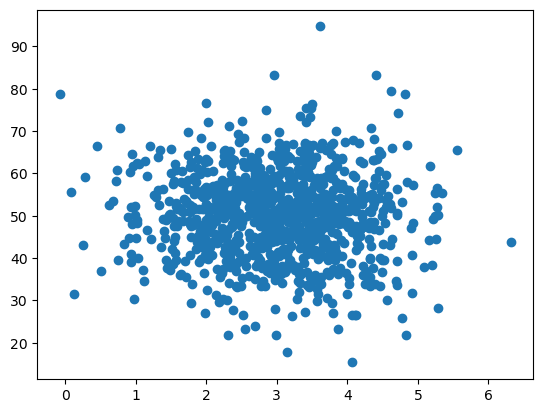

In [7]:
# Import the matplotlib library and use the inline backend to display plots in the notebook
%matplotlib inline

# Import the numpy library and use np as an alias
import numpy as np
# Import the pylab module from matplotlib and use * to import all its functions
from pylab import *

# Define a function de_mean that takes a list of numbers x as an argument
def de_mean(x):
    # Calculate the mean of x and assign it to xmean
    xmean = mean(x)
    # Return a new list of numbers where each element is the difference 
    # between the original element and the mean
    return [xi - xmean for xi in x]

# Define a function covariance that takes two lists of numbers x and y as arguments
def covariance(x, y):
    # Get the length of x and assign it to n
    n = len(x)
    # Return the dot product of de_mean(x) and de_mean(y) divided by (n-1), 
    # which is the formula for sample covariance
    return dot(de_mean(x), de_mean(y)) / (n-1)

# Generate 1000 random numbers from a normal distribution with mean 3.0 
# and standard deviation 1.0 and assign them to pageSpeeds
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
# Generate 1000 random numbers from a normal distribution with mean 50.0 
# and standard deviation 10.0 and assign them to purchaseAmount
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

# Create a scatter plot of pageSpeeds and purchaseAmount using 
# the scatter function from pylab
scatter(pageSpeeds, purchaseAmount)

# Call the covariance function with pageSpeeds and 
# purchaseAmount as arguments and print the result
covariance (pageSpeeds, purchaseAmount)

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

-7.452265047889436

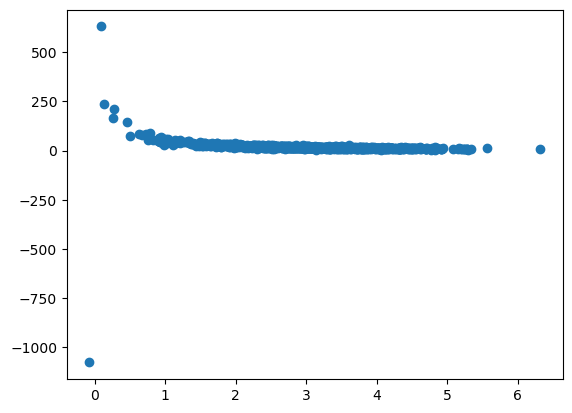

In [8]:
# each element in purchaseAmount will be divided by the corresponding element
# in pageSpeeds and assigns the result back to purchaseAmount
purchaseAmount /= pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance(pageSpeeds, purchaseAmount)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [9]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return (
        covariance(x, y) / stddevx / stddevy
    )  # In real life you'd check for divide by zero here


correlation(pageSpeeds, purchaseAmount)

-0.18292580144707107

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [10]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.18274288],
       [-0.18274288,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

<class 'numpy.ndarray'> 1000


-1.001001001001001

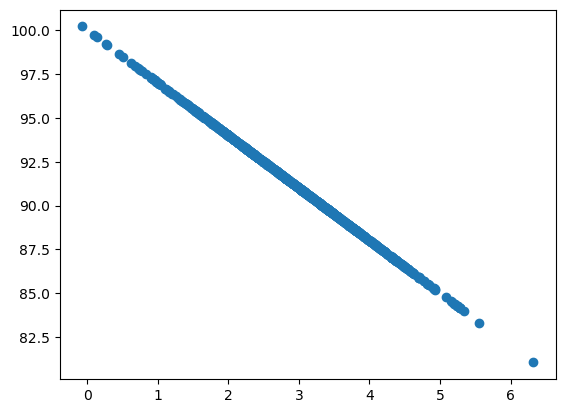

In [14]:
# Each element in purchaseAmount will be calculated by
# subtracting the product of corresponding element in pageSpeeds and 3 from 100.
# This is because the code uses the * operator, which performs an element-wise
# multiplication of two arrays in numpy. For example, if pageSpeeds = [3, 4, 5]
# and purchaseAmount = [50, 60, 70], then pageSpeeds * 3 = [9, 12, 15]
# and purchaseAmount = 100 - pageSpeeds * 3 = [91, 88, 85].
purchaseAmount = 100 - pageSpeeds * 3
print(type(purchaseAmount), len(purchaseAmount))

scatter(pageSpeeds, purchaseAmount)

correlation(pageSpeeds, purchaseAmount)

Remember, correlation does not imply causality!

## Activity

numpy also has a numpy.cov function that can compute Covariance for you. Try using it for the pageSpeeds and purchaseAmounts data above. Interpret its results, and compare it to the results from our own covariance function above.

In [18]:
# Generate 1000 random numbers from a normal distribution with mean 3.0
#  and standard deviation 1.0 and assign them to pageSpeeds
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
# Generate 1000 random numbers from a normal distribution with mean 50.0
#  and standard deviation 10.0 and assign them to purchaseAmount
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

# Call the numpy.cov function with pageSpeeds and purchaseAmount
# as arguments and assign the result to cov_matrix
cov_matrix = np.cov(pageSpeeds, purchaseAmount)
print(type(cov_matrix))

# Print the cov_matrix
print(cov_matrix)

# The output of the code will look something like this:
# [[ 1.01010101 -0.02121212]
#  [-0.02121212 99.8989899 ]]

# The cov_matrix is a 2x2 array that contains the covariance values between
# pageSpeeds and purchaseAmount. The element at row 0 and column 0 is the
# variance of pageSpeeds, which is about 1.01. The element at row 1 and column 1
# is the variance of purchaseAmount, which is about 99.9. The element at row 0 and
# column 1 is the covariance of pageSpeeds and purchaseAmount, which is about -0.02.
# The element at row 1 and column 0 is the same as the element at row 0 and column 1,
# because covariance is symmetric. The result from the numpy.cov function is very
# similar to the result from our own covariance function above, except for
# some minor differences due to rounding errors and random sampling.
# The covariance of pageSpeeds and purchaseAmount is very close to zero,
# which means that there is no linear relationship between them.
# This can also be seen from the scatter plot of pageSpeeds and purchaseAmount,
# which does not show any clear pattern or trend.

<class 'numpy.ndarray'>
[[ 0.97133252 -0.21776445]
 [-0.21776445 97.52117275]]
